In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

Data taken from basketball-reference

In [2]:
adv_2000_df = pd.read_csv('data/2000advanced.csv')
adv_2000_df.head()

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,OWS,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP,Player-additional
0,1,Tariq Abdul-Wahad,SG,25,TOT,61,1578,13.6,0.477,0.036,...,0.4,1.8,2.2,0.068,NaN,-1.2,-0.1,-1.2,0.3,abdulta01
1,2,Shareef Abdur-Rahim,SF,23,VAN,82,3223,20.2,0.547,0.075,...,6.2,2.6,8.8,0.132,NaN,2.6,-0.4,2.2,3.4,abdursh01
2,3,Cory Alexander,PG,26,DEN,29,329,8.8,0.381,0.357,...,-0.5,0.4,-0.1,-0.012,NaN,-4.1,1.8,-2.4,0.0,alexaco01
3,4,Ray Allen*,SG,24,MIL,82,3070,20.6,0.570,0.288,...,9.0,1.0,10.1,0.157,NaN,4.7,-1.1,3.6,4.3,allenra02
4,5,Rafer Alston,PG,23,MIL,27,361,4.3,0.310,0.147,...,-0.7,0.0,-0.7,-0.095,NaN,-5.0,-2.3,-7.3,-0.5,alstora01


In [3]:
#drop unnecessary columns
adv_cols = ['Rk', 'Pos', 'Age', 'Tm', 'FTr', 'ORB%', 'DRB%', 'TRB%','AST%', 'STL%', 'BLK%', 'OWS', 'DWS', 'WS', 'WS/48', 'VORP','Player-additional']
adv_2000_df = adv_2000_df.drop(columns=adv_cols, axis=1)

In [4]:
adv_2000_df.columns.values

Index(['Player', 'G', 'MP', 'PER', 'TS%', '3PAr', 'TOV%', 'USG%',
       'Unnamed: 19', 'Unnamed: 24', 'OBPM', 'DBPM', 'BPM'],
      dtype='object')

In [5]:
#creating dataframe for the rest of 2000 season
per_game_2000_df = pd.read_csv('data/2000pergame.csv')

pg_cols = ['Rk', 'G', 'Tm', 'MP','FG', 'FGA', '2P', '2PA', 'eFG%', 'DRB', 'FT', 'FTA', 'Player-additional']
per_game_2000_df = per_game_2000_df.drop(columns=pg_cols, axis=1)

#combining all into one dataframe
df_2000 = adv_2000_df.merge(per_game_2000_df, on='Player')
df_2000.head()

,Player,G,MP,PER,TS%,3PAr,TOV%,USG%,Unnamed: 19,Unnamed: 24,...,2P%,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Tariq Abdul-Wahad,61,1578,13.6,0.477,0.036,12.7,22.5,NaN,NaN,...,0.435,0.756,1.7,4.8,1.6,1.0,0.5,1.7,2.4,11.4
1,Shareef Abdur-Rahim,82,3223,20.2,0.547,0.075,14.1,25.0,NaN,NaN,...,0.478,0.809,2.7,10.1,3.3,1.1,1.1,3.0,3.0,20.3
2,Cory Alexander,29,329,8.8,0.381,0.357,20.6,18.0,NaN,NaN,...,0.302,0.773,0.3,1.4,2.0,0.8,0.1,1.0,1.3,2.8
3,Ray Allen*,82,3070,20.6,0.570,0.288,10.3,25.6,NaN,NaN,...,0.468,0.887,1.0,4.4,3.8,1.3,0.2,2.2,2.3,22.1
4,Rafer Alston,27,361,4.3,0.310,0.147,23.1,15.5,NaN,NaN,...,0.296,0.750,0.2,0.9,2.6,0.4,0.0,1.1,1.1,2.2


In [6]:
#repeating steps with the 2001 and 2002 seasons
adv_2001_df = pd.read_csv('data/2001advanced.csv').drop(columns=adv_cols, axis=1)
per_game_2001_df = pd.read_csv('data/2001pergame.csv').drop(columns=pg_cols, axis=1)

adv_2002_df = pd.read_csv('data/2002advanced.csv').drop(columns=adv_cols, axis=1)
per_game_2002_df = pd.read_csv('data/2002pergame.csv').drop(columns=pg_cols, axis=1)

adv_2003_df = pd.read_csv('data/2002advanced.csv').drop(columns=adv_cols, axis=1)
per_game_2003_df = pd.read_csv('data/2002pergame.csv').drop(columns=pg_cols, axis=1)

adv_2004_df = pd.read_csv('data/2002advanced.csv').drop(columns=adv_cols, axis=1)
per_game_2004_df = pd.read_csv('data/2002pergame.csv').drop(columns=pg_cols, axis=1)

#merging dataframes
df_2001 = adv_2001_df.merge(per_game_2001_df, on='Player')
df_2002 = adv_2002_df.merge(per_game_2002_df, on='Player')
df_2003 = adv_2003_df.merge(per_game_2003_df, on='Player')
df_2004 = adv_2004_df.merge(per_game_2004_df, on='Player')

#adding dataframes onto one another into one big dataframe for the 3 season stretch
df_2000s = df_2000.append(df_2001, ignore_index=True).append(df_2002, ignore_index=True).append(df_2003, ignore_index=True).append(df_2004, ignore_index=True)
df_2000s.head(10)

,Player,G,MP,PER,TS%,3PAr,TOV%,USG%,Unnamed: 19,Unnamed: 24,...,2P%,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Tariq Abdul-Wahad,61,1578,13.6,0.477,0.036,12.7,22.5,NaN,NaN,...,0.435,0.756,1.7,4.8,1.6,1.0,0.5,1.7,2.4,11.4
1,Shareef Abdur-Rahim,82,3223,20.2,0.547,0.075,14.1,25.0,NaN,NaN,...,0.478,0.809,2.7,10.1,3.3,1.1,1.1,3.0,3.0,20.3
2,Cory Alexander,29,329,8.8,0.381,0.357,20.6,18.0,NaN,NaN,...,0.302,0.773,0.3,1.4,2.0,0.8,0.1,1.0,1.3,2.8
3,Ray Allen*,82,3070,20.6,0.570,0.288,10.3,25.6,NaN,NaN,...,0.468,0.887,1.0,4.4,3.8,1.3,0.2,2.2,2.3,22.1
4,Rafer Alston,27,361,4.3,0.310,0.147,23.1,15.5,NaN,NaN,...,0.296,0.750,0.2,0.9,2.6,0.4,0.0,1.1,1.1,2.2
5,John Amaechi,80,1684,13.2,0.505,0.009,14.4,24.1,NaN,NaN,...,0.439,0.766,0.8,3.3,1.2,0.4,0.5,1.7,2.0,10.5
6,Derek Anderson,64,2201,16.9,0.542,0.207,14.4,23.4,NaN,NaN,...,0.472,0.877,1.3,4.0,3.4,1.4,0.2,2.6,2.3,16.9
7,Kenny Anderson,82,2593,17.4,0.524,0.223,10.6,20.5,NaN,NaN,...,0.456,0.775,0.7,2.7,5.1,1.7,0.1,1.6,2.8,14.0
8,Nick Anderson,72,2094,11.8,0.479,0.508,10.4,18.1,NaN,NaN,...,0.452,0.487,1.2,4.7,1.7,1.3,0.2,1.3,1.6,10.8
9,Shandon Anderson,82,2700,13.8,0.567,0.289,17.9,17.6,NaN,NaN,...,0.523,0.767,1.1,4.7,2.9,1.2,0.4,2.4,2.2,12.3


In [7]:
df_2000s.columns

Index(['Player', 'G', 'MP', 'PER', 'TS%', '3PAr', 'TOV%', 'USG%',
       'Unnamed: 19', 'Unnamed: 24', 'OBPM', 'DBPM', 'BPM', 'Pos', 'Age', 'GS',
       'FG%', '3P', '3PA', '3P%', '2P%', 'FT%', 'ORB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [8]:
#I notice 'Unnamed' columns, so I will drop those
df_2000s.drop(df_2000s.columns[df_2000s.columns.str.contains('Unnamed', case=False)], axis=1, inplace=True)

In [9]:
#Now I'm going to examine this dataframe closer
df_2000s.info()
df_2000s.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  2200 non-null   object 
 1   G       2200 non-null   int64  
 2   MP      2200 non-null   int64  
 3   PER     2200 non-null   float64
 4   TS%     2194 non-null   float64
 5   3PAr    2194 non-null   float64
 6   TOV%    2195 non-null   float64
 7   USG%    2200 non-null   float64
 8   OBPM    2200 non-null   float64
 9   DBPM    2200 non-null   float64
 10  BPM     2200 non-null   float64
 11  Pos     2200 non-null   object 
 12  Age     2200 non-null   int64  
 13  GS      2200 non-null   int64  
 14  FG%     2194 non-null   float64
 15  3P      2200 non-null   float64
 16  3PA     2200 non-null   float64
 17  3P%     1801 non-null   float64
 18  2P%     2193 non-null   float64
 19  FT%     2137 non-null   float64
 20  ORB     2200 non-null   float64
 21  TRB     2200 non-null   float64
 22  

Player      0
G           0
MP          0
PER         0
TS%         6
3PAr        6
TOV%        5
USG%        0
OBPM        0
DBPM        0
BPM         0
Pos         0
Age         0
GS          0
FG%         6
3P          0
3PA         0
3P%       399
2P%         7
FT%        63
ORB         0
TRB         0
AST         0
STL         0
BLK         0
TOV         0
PF          0
PTS         0
dtype: int64

In [10]:
#examining rows with null values. There appears to be a link with the shooting percentages and null values
df_2000s[df_2000s['3P%'].isnull()].head()
#It looks like the Null values are because they didn't attempt a shot. I believe that's the reason for all the other % based stats like FG%, 3P%, 2P%, eFG%, FT% having null values
#I think if I just create a qualifier on MP (minutes played) to remove players this should fix the null values
#I also think I need to create a qualifier anyway so as not to skew the data

,Player,G,MP,PER,TS%,3PAr,TOV%,USG%,OBPM,DBPM,...,2P%,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,PTS
17,Anthony Avent,49,377,5.5,0.368,0.0,17.9,15.8,-6.9,-0.5,...,0.302,0.719,0.5,1.5,0.2,0.3,0.3,0.5,1.3,1.7
28,Benoit Benjamin,3,8,5.5,0.333,0.0,0.0,16.3,-6.0,-0.3,...,0.333,NaN,0.0,0.3,0.0,0.0,0.3,0.0,0.3,0.7
30,Mario Bennett,1,3,-25.5,0.000,0.0,0.0,44.4,-25.2,-19.1,...,0.000,NaN,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
37,Etdrick Bohannon,13,118,10.5,0.615,0.0,29.8,12.7,-4.7,-0.9,...,0.538,0.625,1.0,2.4,0.4,0.2,0.5,0.8,1.9,2.2
38,Calvin Booth,11,143,11.9,0.403,0.0,10.3,18.0,-3.9,0.1,...,0.348,0.714,1.4,2.9,0.6,0.3,1.3,0.5,2.1,3.8


In [11]:
#It looks like there are some player's data that is not necessary and will skew the dataset but there are also some player's data that may be valuable
#I'm going to look closer into this set to see how to best clean the data
df_2000s[df_2000s['3P%'].isnull()].describe()

,G,MP,PER,TS%,3PAr,TOV%,USG%,OBPM,DBPM,BPM,...,2P%,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,PTS
count,399.000000,399.000000,399.000000,393.000000,393.0,394.000000,399.000000,399.000000,399.000000,399.000000,...,393.000000,363.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000
mean,37.656642,652.744361,10.689474,0.476646,0.0,16.489594,16.126065,-3.746366,-0.065414,-3.817794,...,0.437824,0.616758,1.191729,3.361905,0.540100,0.315288,0.584461,0.744110,1.747118,3.981704
std,26.953243,757.651317,6.432486,0.131183,0.0,8.531458,5.191273,3.893434,2.267258,5.257998,...,0.129125,0.179678,0.916957,2.659713,0.541723,0.286973,0.629835,0.578691,0.891436,3.370429
min,1.000000,1.000000,-25.500000,0.000000,0.0,0.000000,0.000000,-25.200000,-19.100000,-44.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,92.000000,7.700000,0.427000,0.0,12.200000,13.000000,-5.600000,-0.900000,-5.600000,...,0.391000,0.508000,0.600000,1.600000,0.200000,0.100000,0.200000,0.350000,1.000000,1.500000
50%,33.000000,281.000000,11.200000,0.499000,0.0,15.700000,15.700000,-3.500000,0.100000,-3.600000,...,0.455000,0.647000,1.000000,2.500000,0.300000,0.200000,0.400000,0.600000,1.900000,3.000000
75%,62.000000,989.000000,14.000000,0.545000,0.0,19.900000,18.400000,-1.350000,0.900000,-1.300000,...,0.503000,0.737500,1.700000,4.500000,0.800000,0.400000,0.800000,1.000000,2.400000,5.400000
max,82.000000,3254.000000,35.800000,1.000000,0.0,100.000000,44.400000,10.700000,10.100000,15.300000,...,1.000000,1.000000,5.000000,16.300000,3.500000,2.000000,3.700000,3.500000,3.800000,20.800000


In [12]:
#The null values in the '3P%' feature are a result of a player not attempting a single 3 pointer in any of these 3 seasons.
#Before dealing with those null values, I'm going to filter the group by adding a minimum for minutes played (MP) in a season.
#I'm choosing 1000 because that means the player has played an average of 12 minutes per game over the course of 82 games (total games in a season)
#This means that said player likely played a role in a team's rotation
df_2000s = df_2000s.loc[df_2000s['MP'] > 1000]
print(df_2000s.isna().sum())
df_2000s.describe()

Player     0
G          0
MP         0
PER        0
TS%        0
3PAr       0
TOV%       0
USG%       0
OBPM       0
DBPM       0
BPM        0
Pos        0
Age        0
GS         0
FG%        0
3P         0
3PA        0
3P%       99
2P%        0
FT%        0
ORB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
dtype: int64


,G,MP,PER,TS%,3PAr,TOV%,USG%,OBPM,DBPM,BPM,...,2P%,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,PTS
count,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,...,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000
mean,72.696007,2032.162999,14.933089,0.521051,0.170791,13.635371,19.587857,-0.044417,0.040587,-0.006275,...,0.465604,0.748712,1.377832,4.882478,2.596740,0.912551,0.600326,1.642624,2.405868,11.350204
std,9.763250,631.994504,3.770526,0.041147,0.166824,3.461231,4.932719,2.306270,1.101963,2.579651,...,0.040932,0.098321,0.880029,2.411679,1.981128,0.443465,0.609616,0.725048,0.627092,5.598998
min,29.000000,1001.000000,5.500000,0.359000,0.000000,6.300000,6.500000,-5.800000,-2.800000,-6.900000,...,0.348000,0.262000,0.100000,1.000000,0.200000,0.200000,0.000000,0.400000,0.800000,2.400000
25%,67.000000,1505.500000,12.500000,0.493000,0.009000,11.200000,16.100000,-1.500000,-0.800000,-1.700000,...,0.438000,0.698000,0.700000,3.100000,1.100000,0.600000,0.200000,1.100000,2.000000,7.100000
50%,76.000000,1954.000000,14.500000,0.521000,0.132000,13.200000,19.300000,-0.200000,0.000000,-0.100000,...,0.464000,0.765000,1.200000,4.300000,2.000000,0.800000,0.400000,1.500000,2.400000,9.900000
75%,81.000000,2504.000000,17.000000,0.546500,0.295500,15.700000,22.600000,1.300000,0.800000,1.500000,...,0.493000,0.817000,1.900000,6.200000,3.500000,1.100000,0.800000,2.100000,2.800000,14.200000
max,85.000000,3464.000000,30.600000,0.660000,0.813000,29.900000,37.800000,7.600000,3.600000,9.300000,...,0.615000,0.950000,5.000000,14.100000,10.900000,2.800000,3.700000,4.100000,4.500000,31.400000


In [13]:
#That cleaned up quite a bit. Let me examine the leftover null values in shooting percentage
print(df_2000s[df_2000s['3P%'].isnull()].head())
#This may be helpful for showing an overall trend in playstyle
print(df_2000s[df_2000s['3P%'].isnull()].Pos.value_counts())

              Player   G    MP   PER    TS%  3PAr  TOV%  USG%  OBPM  DBPM  \
56       Mark Bryant  75  1712   8.9  0.547   0.0  18.3  12.0  -3.4  -0.2   
97     Antonio Davis  79  2479  15.1  0.520   0.0  12.1  17.8  -1.0  -1.0   
100       Dale Davis  74  2127  17.4  0.537   0.0  11.6  16.7   0.7   0.1   
106  Andrew DeClercq  82  1831  11.4  0.530   0.0  17.4  14.8  -2.9   0.6   
135     Adonal Foyle  76  1654  12.3  0.500   0.0  14.5  12.5  -2.8  -0.1   

     ...    2P%    FT%  ORB  TRB  AST  STL  BLK  TOV   PF   PTS  
56   ...  0.503  0.809  1.7  4.7  0.8  0.4  0.4  1.2  3.3   5.7  
97   ...  0.440  0.765  3.0  8.8  1.3  0.5  1.3  1.5  3.4  11.5  
100  ...  0.502  0.685  3.5  9.9  0.9  0.7  1.3  1.2  2.7  10.0  
106  ...  0.508  0.588  1.9  5.4  0.7  0.8  0.8  1.3  3.4   6.6  
135  ...  0.508  0.378  2.3  5.6  0.6  0.3  1.8  0.9  2.9   5.5  

[5 rows x 28 columns]
C     74
PF    23
SF     2
Name: Pos, dtype: int64


In [14]:
#It appears that nearly every single guard (PG/SG) in our dataset has at least attempted one 3 pointer. The only players that haven't have mostly been Cs and some PFs
#Given this information, I think that it's best to drop the '3P%' column and just use 3PA as the 0 attempts may prove to be valuable for my model
df_2000s = df_2000s.drop(columns=['3P%'], axis=1)

In [15]:
df_2000s['Pos'].value_counts()

SF       255
SG       247
PF       244
PG       242
C        231
PG-SG      3
SF-SG      2
PF-SF      1
C-PF       1
SG-PG      1
Name: Pos, dtype: int64

In [16]:
#Some players are listed as having two positions. For simplicity, I will convert them to one singular and primary position. That will be the first position before the '-'
position = ['PG-SG', 'SF-SG', 'SF-PF', 'PF-SF', 'C-PF', 'SG-PG']
prim_pos = ['PG', 'SF', 'SF', 'PF', 'C', 'SG']

df_2000s['Pos'] = df_2000s['Pos'].replace(position, prim_pos)

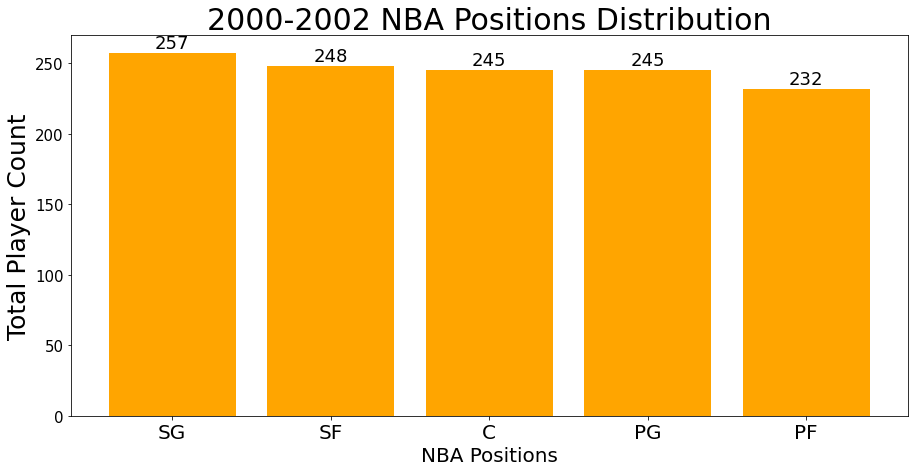

In [17]:
#Checking frequency of target variable (Position)
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize = (15,7))

ax.bar(
    df_2000s['Pos'].unique(),
    df_2000s['Pos'].value_counts(),
    color = 'Orange'
)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=15)
ax.set_ylabel('Total Player Count', fontsize=25)
ax.set_xlabel('NBA Positions', fontsize=20)
ax.set_title('2000-2002 NBA Positions Distribution', fontsize=30)
    
for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(
        label, (x_value, y_value), xytext=(0, space), textcoords="offset points", 
        ha='center', va='bottom', fontsize=18, color='k'
    )
plt.show()

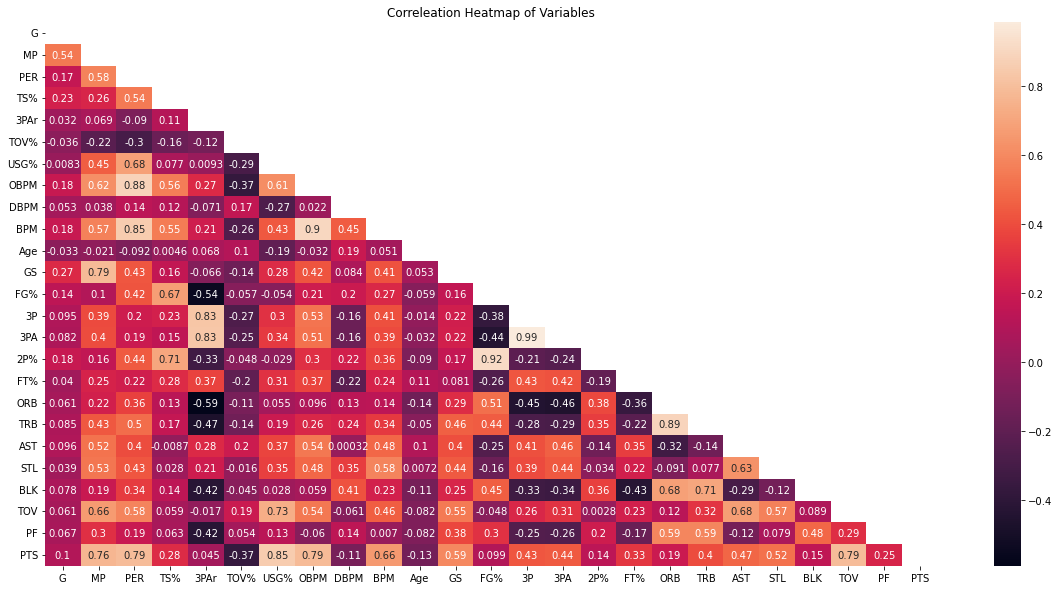

In [18]:
import seaborn as sns

#making price the target variable
X = df_2000s.drop('Pos', axis=1)
y = df_2000s['Pos']

#heatmap to show multicollinearity
heatmap_df = pd.concat([y, X], axis=1)
corr = heatmap_df.corr()

#importing libraries
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize = (20,10))

sns.heatmap(
    data = corr,
    mask = np.triu(np.ones_like(corr, dtype=bool)),
    ax=ax,
    annot=True
)

ax.set_title('Correleation Heatmap of Variables');

In [19]:
#I'm seeing a lot of overlap still, so I will be dropping some of the highly correlated features.
#For example, the 3pt shooting statistics can all be kept under 3 point attempts(3PA) as well as some created advanced stats like Player Effiency Rating (PER) and OBPM (Offensive Box Plus Minus)
#Also, after filtering, the games played(G and GS) played aren't as important for the model that I'm trying to build
irr_cols = ['G', 'MP', 'PER', 'FG%', '3P', '3PAr', 'GS', 'ORB', 'OBPM', 'Age', 'TS%']
df_2000s = df_2000s.drop(columns=irr_cols, axis=1)

In [20]:
#examining if there are any initial trends among the stats
df_2000s.groupby('Pos').mean()

,TOV%,USG%,DBPM,BPM,3PA,2P%,FT%,TRB,AST,STL,BLK,TOV,PF,PTS
Pos,,,,,,,,,,,,,,
C,14.053879,17.573707,0.276293,-0.973276,0.157328,0.485595,0.661823,6.748276,1.024138,0.591379,1.274138,1.347845,2.854741,9.110776
PF,13.657143,19.420408,0.213061,-0.068571,0.868980,0.470710,0.730882,6.689388,1.831837,0.815510,0.851837,1.663673,2.722041,11.468980
PG,15.836327,19.630612,-0.137551,0.370204,2.424898,0.445600,0.786400,2.885714,5.134694,1.113878,0.148980,1.910204,2.026531,10.776327
SF,12.781323,20.731518,-0.113619,0.072374,2.087549,0.468327,0.762296,4.686381,2.221790,0.957977,0.473930,1.683268,2.391829,12.447471
SG,11.933065,20.410081,-0.014516,0.506452,2.794355,0.458798,0.796302,3.527823,2.704839,1.062903,0.298387,1.591129,2.062903,12.757661


In [21]:
#export the dataframe for easier use in my other notebook
df_2000s.to_csv('data/dataframe_2000s.csv', index=False)